### Objective
The goal of this assignment is to get accustomed with `torch.tensor`, the `timeit` function, and `matplotlib` by expanding upon what we did in class. This assignment will go over matrix-matrix multiplication and measure the speedup of vectorized multiplication vs. plain python multiplication.

### Approach
First up, I wrote a function that generates a matrix as a list of lists and populates it with random numbers. This function essentially generates the data we will use to do matrix-matrix multiplication.

To make the matrix easier to comprehend, the function will, by default, populate the matrix with values ranging from 0 to 100 rounded to two decimal places. 

In [79]:
import random

def generate_matrix(rows, cols, max_value=100, min_value=0):
    return [[round(random.uniform(min_value, max_value) * 100) / 100 for _ in range(cols)] for _ in range(rows)]

I then implemented a function to do matrix multiplication **in plain Python** using nested for loops. Notice that the `result` list is passed in as a parameter so that we when run the function to measure how long matrix multiplication takes with plain Python, we don't measure the initialization of a result list.

In [80]:
from typing import List

def python_matrix_multiply(A: List[List], B: List[List], result=None):
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])

    if cols_A != rows_B:
        raise ValueError("Cannot multiply matrices: incompatible dimensions.")

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
    return result

Now to put all my functions to use. I write a list of ten different m values {10, 20, 30, ..., 90, 100} in order to generate pairs of matrices W and X such that W has size (90, m) and X has size (m, 110).

I then perform matrix multiplication using `torch.mm()` and the previously defined `python_matrix_multiplication()`, use `timeit` to record their respective execution time, and calculate the time improvement ratio between the two ways of performing matrix multiplication.

I used `torch.mm()` instead of `torch.matmul()` because `torch.mm()` strictly handles the matrix product of two 2-D tensors. If either tensor has more than 2 dimensions, `torch.mm()` will raise an error.

In [81]:
import timeit
import torch

m_values = list(range(10, 101, 10)) # Values of m
average_ratios = []

for r in range(200):
    ratios = []       # List to store the speed improvement ratios
    for m in m_values:
        W = generate_matrix(90, m)
        X = generate_matrix(m, 110)
        W_t = torch.tensor(W)
        X_t = torch.tensor(X)
        result = [[0 for _ in range(110)] for _ in range(90)]

        # Measure time taken to multiply W and X
        python_execution_time = timeit.timeit(lambda: python_matrix_multiply(W, X, result), number = 1)
        torch_execution_time = timeit.timeit(lambda: torch.mm(W_t, X_t), number = 1)
        print(f"r = {r:03} | m = {m:03} \t Plain Python: {python_execution_time:.5f} seconds | Torch: {torch_execution_time:.7f} seconds")

        # Calculate and store the improvement ration to graph later
        ratio = python_execution_time / torch_execution_time
        ratios.append(ratio)
    average_ratios.append(ratios)

r = 000 | m = 010 	 Plain Python: 0.00693 seconds | Torch: 0.0001840 seconds
r = 000 | m = 020 	 Plain Python: 0.01165 seconds | Torch: 0.0000326 seconds
r = 000 | m = 030 	 Plain Python: 0.01530 seconds | Torch: 0.0000415 seconds
r = 000 | m = 040 	 Plain Python: 0.02055 seconds | Torch: 0.0000400 seconds
r = 000 | m = 050 	 Plain Python: 0.02448 seconds | Torch: 0.0000249 seconds
r = 000 | m = 060 	 Plain Python: 0.02962 seconds | Torch: 0.0000356 seconds
r = 000 | m = 070 	 Plain Python: 0.03418 seconds | Torch: 0.0000401 seconds
r = 000 | m = 080 	 Plain Python: 0.03937 seconds | Torch: 0.0000554 seconds
r = 000 | m = 090 	 Plain Python: 0.04543 seconds | Torch: 0.0000529 seconds
r = 000 | m = 100 	 Plain Python: 0.05049 seconds | Torch: 0.0000457 seconds
r = 001 | m = 010 	 Plain Python: 0.00548 seconds | Torch: 0.0000162 seconds
r = 001 | m = 020 	 Plain Python: 0.01033 seconds | Torch: 0.0000295 seconds
r = 001 | m = 030 	 Plain Python: 0.01556 seconds | Torch: 0.0000368 seconds

Below is the `matplotlib` code to plot a line graph of the speed improvement ratio.

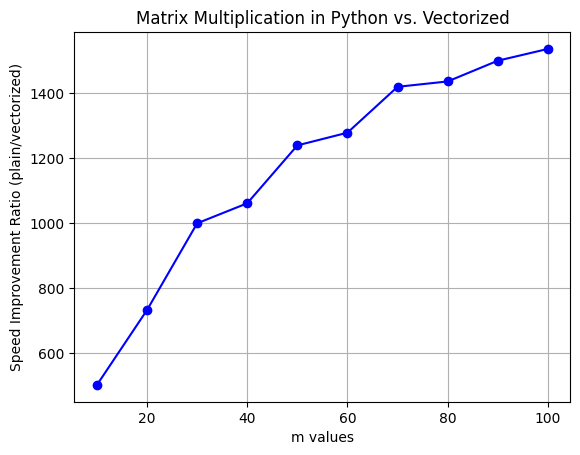

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

average = np.mean(average_ratios, axis = 0)

plt.plot(m_values, average, marker='o', linestyle='-', color='b')
plt.xlabel("m values")
plt.ylabel("Speed Improvement Ratio (python/vectorized)")
plt.title("Matrix Multiplication in Python vs. Vectorized")
plt.grid(True)
plt.show()